<a href="https://colab.research.google.com/github/davidleonardoouuu88/2025-segundo-semestre-ia-economia/blob/main/Taller_PCA_Martinez%2CJimenez_Leonardo%2CCarlos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/5_Aprendizaje_supervisado/1_Taller_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Regresión Lineal**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

-David Leonardo Martinez Pinzon
- Carlos Andres Jimenez Sanchez

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_PCA_apellidos_estudiantes.ipynb”.

**Plazo de entrega**

Hoy, 29 de octubre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

Contexto: Tu Primer Proyecto en AutoAnalitica 📈 🚗

¡Felicitaciones! Has sido contratado como Científico de Datos Junior en AutoAnalitica, una firma de consultoría líder que asesora a grandes concesionarios de autos usados en el país.

Tu primer proyecto es construir un prototipo de modelo de pricing inteligente. La gerencia de uno de nuestros clientes principales está preocupada porque sus agentes de ventas tasan los vehículos que reciben basándose únicamente en su intuición, lo que genera precios inconsistentes y pérdida de oportunidades.

El objetivo: Desarrollar un modelo de machine learning que pueda predecir el precio de venta justo de un automóvil basándose en sus características (antigüedad, kilómetros recorridos, tipo de combustible, etc.). Esta herramienta no busca reemplazar al vendedor, sino darle un precio base, basado en datos, para hacer ofertas más rápidas, justas y competitivas. Tu misión hoy es construir el primer modelo base y evaluar su precisión.

# 1. Importar librerías necesarias

In [1]:
### TU CÓDIGO AQUÍ ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Mejorar visualización de dataframes y gráficos

In [2]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Cargar el dataset `car data.csv`.

- Car_Name: The name of each car.
- Year: The year that the car was bought.
- Selling_Price: The price that the car has at the sale time (thousands of USD). Esta es la variable objetivo.
- Present_Price: The price that car has right now (thousands of USD).
- Kms_Driven: The number of kilometers that the car is driven.
- Fuel_Type: The type of fuel that the car consumes.
- Seller_Type: The type of car seller: individual or dealer.
- Transmission: The type of the car gear: manual or automatic.
- Owner: The number of previous owners of the car.

In [12]:
# Carga el dataset
### TU CÓDIGO AQUÍ ###
car_data = pd.read_csv('car data.csv')


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
# Mostrar las primeras filas para entender la estructura
### TU CÓDIGO AQUÍ ###
display(car_data.head())


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# 3. Análisis Exploratorio de Datos (EDA) y preparación de datos

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [23]:
# Revisa si hay filas duplicadas y elíminalas
### TU CÓDIGO AQUÍ ###
df.drop_duplicates(inplace=True)


In [24]:
# Muestras las estadísticas descriptivas
### TU CÓDIGO AQUÍ ###
print("\nEstadísticas descriptivas:")
df.describe()


Estadísticas descriptivas:


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.00,299.00,299.00,299.00,299.00
mean,"2,013.62",4.59,7.54,"36,916.75",0.04
std,2.90,4.98,8.57,"39,015.17",0.25
min,"2,003.00",0.10,0.32,500.00,0.00
25%,"2,012.00",0.85,1.20,"15,000.00",0.00
50%,"2,014.00",3.51,6.10,"32,000.00",0.00
75%,"2,016.00",6.00,9.84,"48,883.50",0.00
max,"2,018.00",35.00,92.60,"500,000.00",3.00


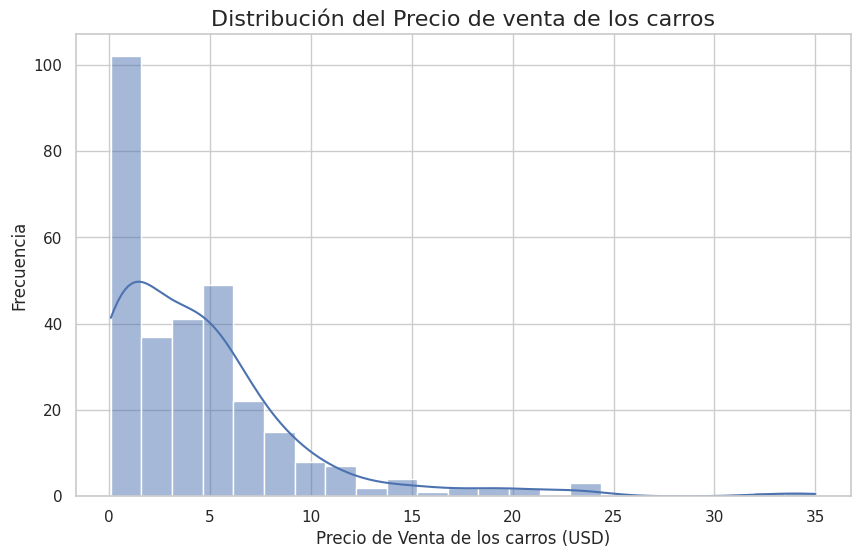

In [26]:
# Grafica un histograma para ver la distribución de la variable independiente "Selling_Price"
### TU CÓDIGO AQUÍ ###
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribución del Precio de venta de los carros', fontsize=16)
plt.xlabel('Precio de Venta de los carros (Miles USD)')
plt.ylabel('Frecuencia')
plt.show()

Escribe tus conclusiones aquí.

Se observa un sesgo a la derecha. Es posible que haya una censura de los datos en su exploración en los precios de venta maximos sobre 35 (Topeado). El precio de venta de la mayoría de los carros se concentra entre 0.1 - 6. Esto genera una cola larga hacia la derecha, típica de un sesgo positivo.


Relación entre Kilometraje y Precio de venta de los carros:


<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

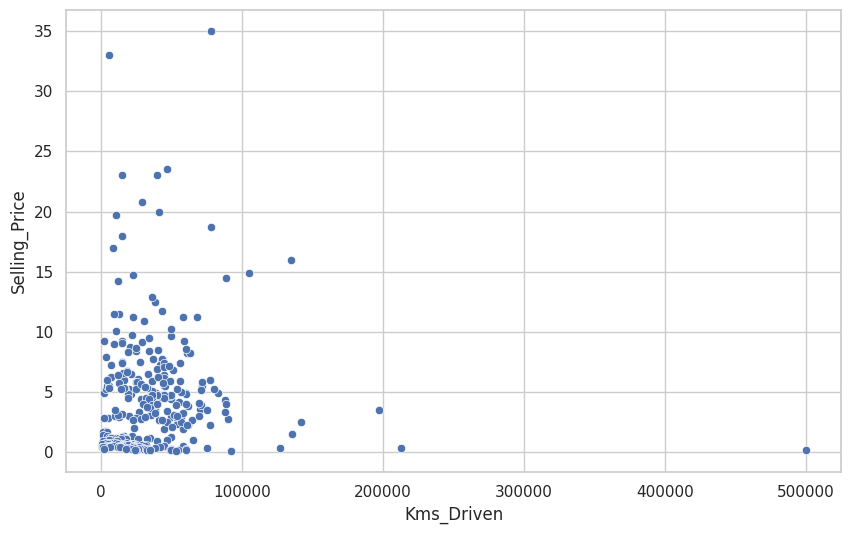

In [27]:
# Visualiza la relación entre 'Kms_Driven' y 'Selling_Price'
### TU CÓDIGO AQUÍ ###
print("\nRelación entre Kilometraje y Precio de venta de los carros:")
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=df)

Basado en el gráfico, ¿qué tipo de relación observas? ¿Es lo que esperabas económicamente?

In [28]:
# Crea la variable "Car_Age" que será la resta entre el año actual y el año del carro
### TU CÓDIGO AQUÍ ###
df['Car_Age'] = 2025 - df['Year']

In [29]:
# Elimina la columna 'Car_Name' que no usaremos
### TU CÓDIGO AQUÍ ###
df.drop('Car_Name', axis=1, inplace=True)

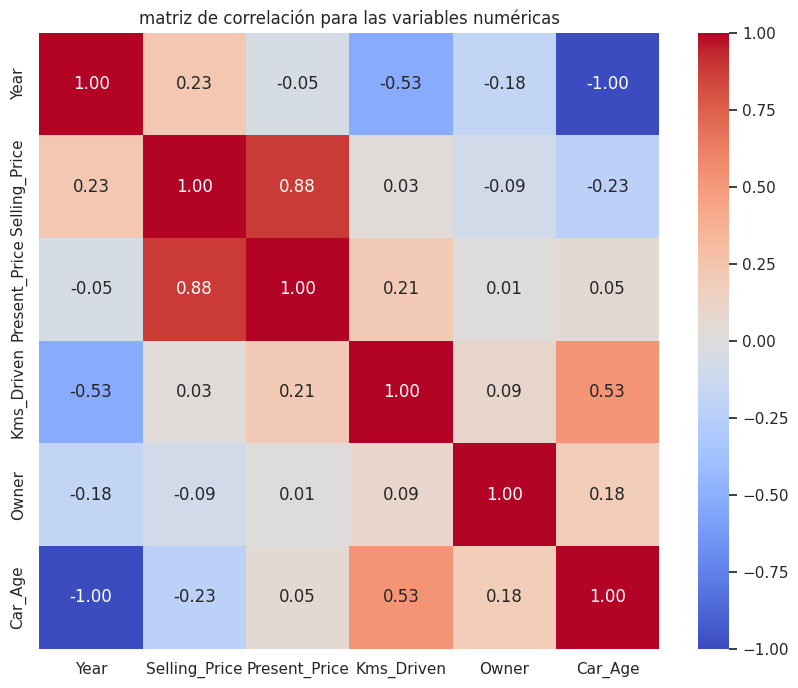

In [31]:
# Calcula la matriz de correlación para las variables numéricas y grafica el heatmap
### TU CÓDIGO AQUÍ ###
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('matriz de correlación para las variables numéricas')
plt.show()

Escribe tus conclusiones aquí.

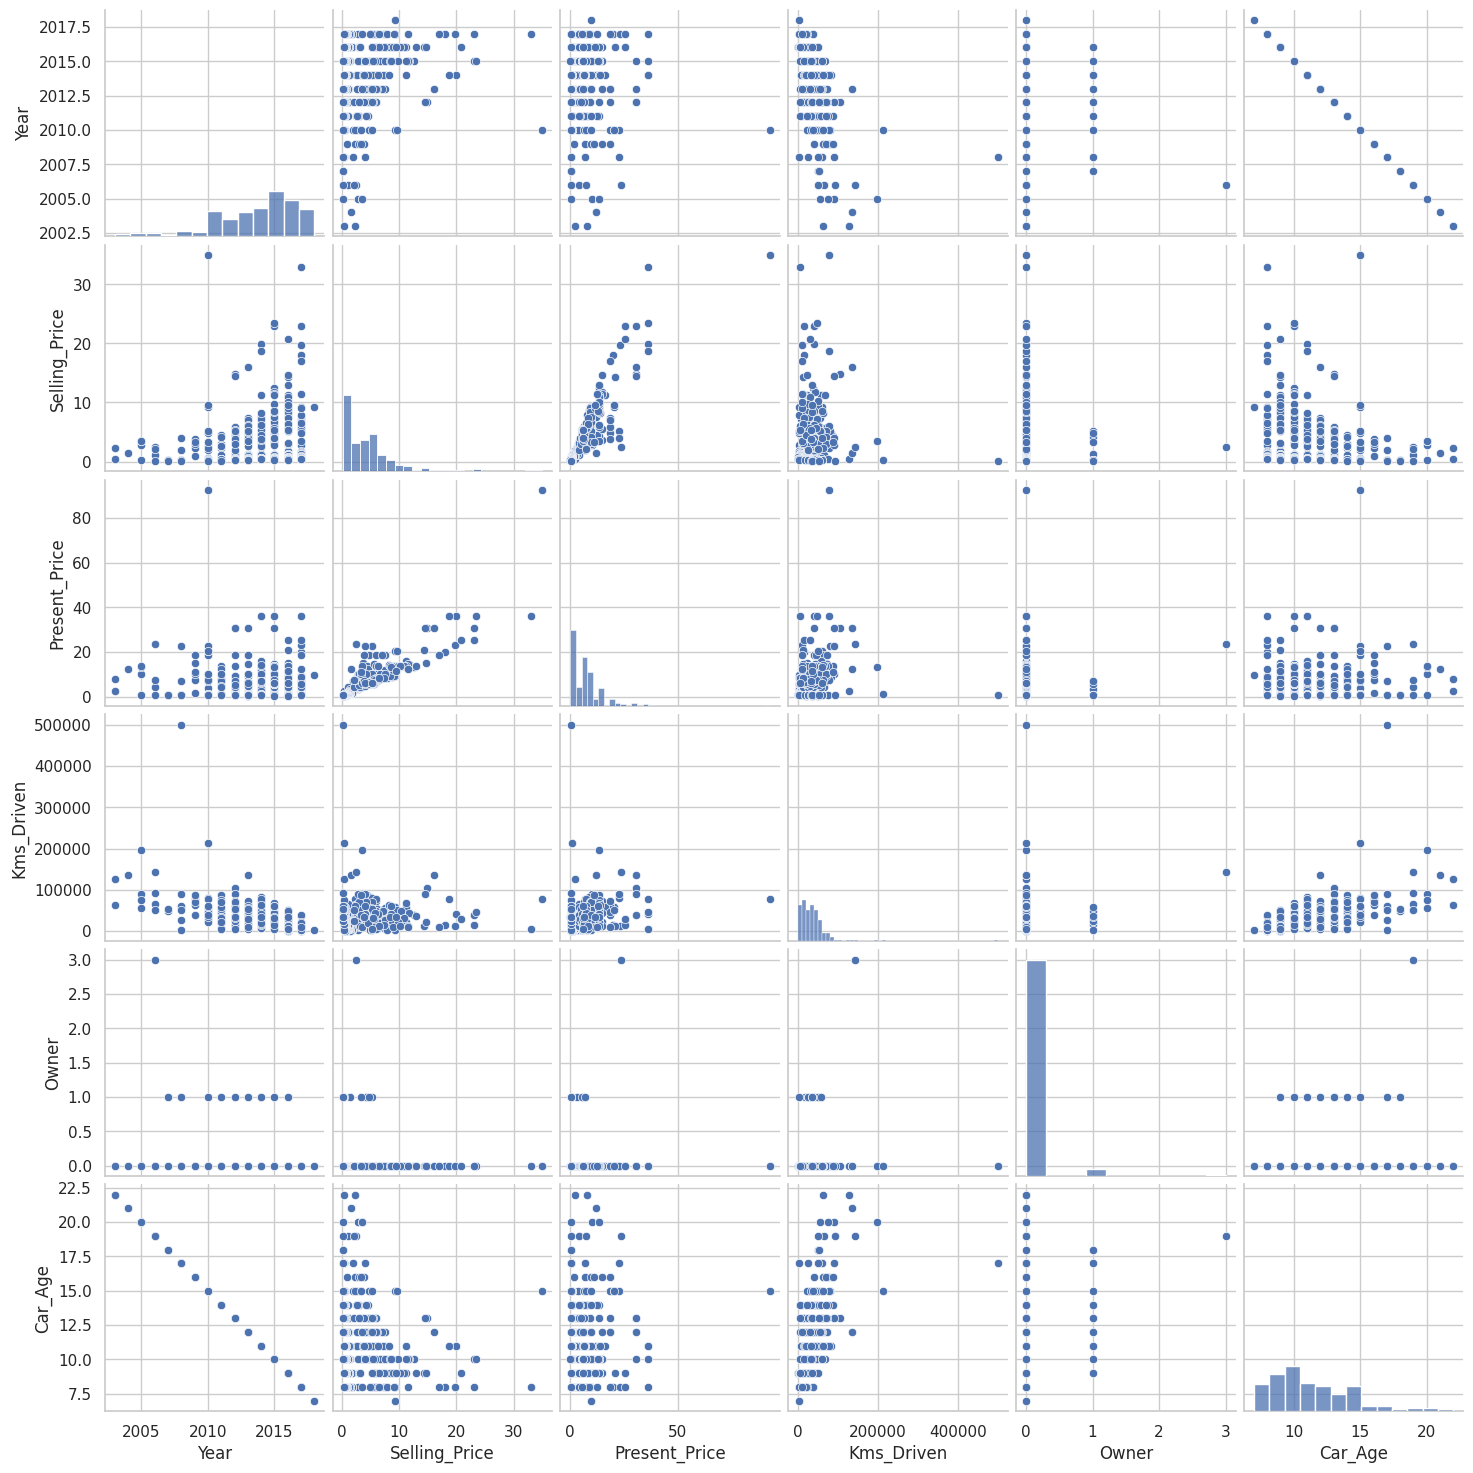

In [37]:
# Realiza un gráfico de pairplot para ver el comportamiento de las variables independientes y la dependiente
### TU CÓDIGO AQUÍ ###
y = df['Selling_Price']
x = df.drop('Selling_Price', axis=1)
df_numeric = df.select_dtypes(include=[np.number])
sns.pairplot(df_numeric)
plt.show()

Escribe tus conclusiones aquí.

In [39]:

# 1. Convertir las variables categóricas a numéricas (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

# 2. Verificar resultado
df_encoded.head()

# 3. Definir variable dependiente (Y) e independientes (X)
X = df_encoded.drop('Selling_Price', axis=1)   # Ejemplo: 'Selling_Price' es la variable objetivo
y = df_encoded['Selling_Price']

# 4. (Opcional) Verificar dimensiones
print(X.shape, y.shape)


(299, 9) (299,)


# 4. Construcción y Evaluación del Modelo

In [40]:
# Define tus variables X e y
### TU CÓDIGO AQUÍ ###
### TU CÓDIGO AQUÍ ###

y = df_encoded['Selling_Price']
X = df_encoded.drop('Selling_Price', axis=1)


In [41]:
# Divide los datos en entrenamiento y prueba (80% / 20%)
### TU CÓDIGO AQUÍ ###
### TU CÓDIGO AQUÍ ###

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(239, 9) (60, 9) (239,) (60,)


In [44]:
# Entrena el modelo de Regresión Lineal
### TU CÓDIGO AQUÍ ###

modelo_ml  = LinearRegression()
modelo_ml .fit(X_train, y_train)



LinearRegression()

In [45]:
# Realiza predicciones sobre el conjunto de prueba
### TU CÓDIGO AQUÍ ###
predicciones = modelo_ml.predict(X_test)

In [46]:
# Calcula las métricas de evaluación (RMSE y R2) para entrenamiento y prueba y compáralas
### TU CÓDIGO AQUÍ ###
mse = mean_squared_error(y_test, predicciones)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

print(f"Métricas de Desempeño sobre el Conjunto de Prueba:")
print(f"-------------------------------------------------")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R-cuadrado): {r2:.4f}")

Métricas de Desempeño sobre el Conjunto de Prueba:
-------------------------------------------------
Error Cuadrático Medio (MSE): 6.3708
Raíz del Error Cuadrático Medio (RMSE): 2.5240
Coeficiente de Determinación (R-cuadrado): 0.7528


# 5. Conclusión para el Cliente

*Escribe un párrafo para los gerentes de 'AutoAnalitica'.*

1. Empieza explicando qué es el RMSE en términos sencillos (ej. "nuestro modelo se equivoca en promedio en..."). Recuerda que el precio en el dataset está en miles de dólares.

El RMSE (Raíz del Error Cuadrático Medio) muestra, en términos sencillos, cuánto se equivoca en promedio el modelo al estimar el precio de un vehículo. En este caso, el valor obtenido es de 2.524, lo que implica que el modelo comete un error promedio de aproximadamente 2.500 dólares por carro, considerando que los precios están expresados en miles de dólares. Por su parte, el R² = 0.75 indica que el modelo logra explicar cerca del 75% de la variación en los precios de venta, lo cual sugiere un nivel de ajuste razonablemente bueno para un primer ejercicio. En conjunto, los resultados muestran que el modelo tiene un buen desempeño inicial, útil como herramienta exploratoria para analizar determinantes del precio, realizar estimaciones preliminares o apoyar decisiones comerciales dentro de la empresa.

2. Termina dando tu recomendación: ¿Es este modelo lo suficientemente bueno como un primer paso? ¿Para qué podría ser útil?

Sería recomendable seguir refinando el modelo, incorporando más variables relevantes o métodos no lineales que puedan capturar mejor las dinámicas del mercado automotor. Este modelo puede ser útil para estimar precios de vehículos de forma rápida y objetiva, apoyando la toma de decisiones en compra y venta. También permite identificar autos sobrevalorados o subvalorados y analizar qué factores influyen más en el precio, lo que ayuda a diseñar estrategias comerciales más precisas. Aunque es un primer paso, ofrece una base sólida para futuras mejoras y aplicaciones analíticas dentro de AutoAnalítica.